# The Sparks Foundation
#       GRIP  JAN21
#      Task 4: Exploratory Data Analysis Terrorism

# Ritik Bhardwaj

importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

Renaming important columns in data and dropping column having more than 16000 NaN values

In [5]:
df.rename(columns ={"country_txt":"Country", "iyear":"Year", 'imonth':'month','region_txt':"Region"\
                ,"attacktype1_txt":"Attack_type","weaptype1_txt":"Weapon Used","targtype1_txt"\
                   :"Target_type",'gname':"Terrorist group"}, inplace = True)

In [6]:
# dropping columns having more than 160000 null values
df.dropna(thresh = 160000,axis = 1, inplace = True)
print(df.columns)

Index(['eventid', 'Year', 'month', 'iday', 'extended', 'country', 'Country',
       'region', 'Region', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1', 'Attack_type',
       'targtype1', 'Target_type', 'targsubtype1', 'targsubtype1_txt',
       'target1', 'natlty1', 'natlty1_txt', 'Terrorist group', 'guncertain1',
       'individual', 'weaptype1', 'Weapon Used', 'weapsubtype1',
       'weapsubtype1_txt', 'nkill', 'nwound', 'property', 'ishostkid',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')


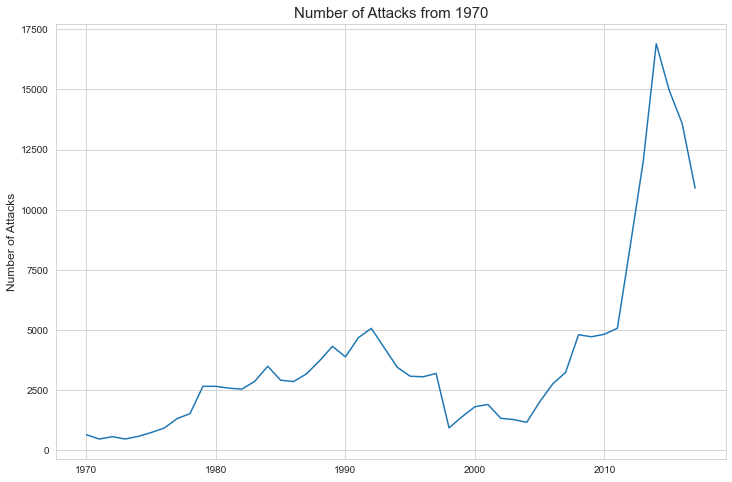

In [7]:
plt.figure(figsize = (12,8))
sns.lineplot(df["Year"].value_counts().index,df["Year"].value_counts())
plt.ylabel("Number of Attacks", fontsize = 12)
plt.title("Number of Attacks from 1970", fontsize = 15)
plt.show()

From the Graph it is clear that Number of Terrorist attacks surged after 2010

In [8]:
print(df["Year"].value_counts().nlargest(15))
print(f"Most number of Terrorist attacks were commited in {df.Year.value_counts().index[0]} : {df.Year.value_counts().max()}")

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
Name: Year, dtype: int64
Most number of Terrorist attacks were commited in 2014 : 16903


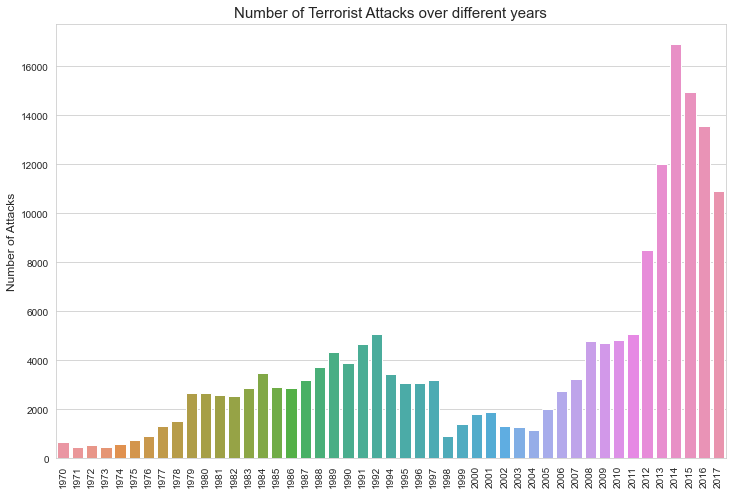

In [9]:
plt.figure(figsize = (12,8))
sns.barplot(df["Year"].value_counts().index,df["Year"].value_counts())
plt.ylabel("Number of Attacks", fontsize = 12)
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Attacks over different years", fontsize = 15)
plt.show()

In 2014 largest number of Terrorist Attacks were carried out

In [10]:
print(df["Region"].value_counts())
print(f"Most number of Terrorist attacks were commited in {df.Region.value_counts().index[0]} : \
{df.Region.value_counts().max()}")

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64
Most number of Terrorist attacks were commited in Middle East & North Africa : 50474


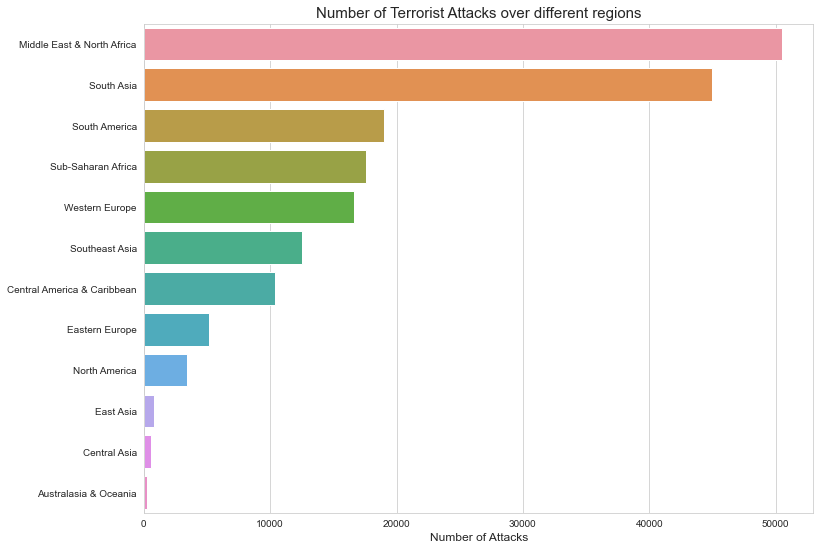

In [11]:
plt.figure(figsize = (12,9))
sns.barplot(df["Region"].value_counts(),df["Region"].value_counts().index)
plt.xlabel("Number of Attacks", fontsize = 12)
plt.title("Number of Terrorist Attacks over different regions", fontsize = 15)
plt.show()

MiddleEast, North Africa and South Asia are most suffered regions

In [12]:
df_ME = df.loc[df["Region"]=="Middle East & North Africa"]
df_SAs = df.loc[df["Region"]=="South Asia"]
df_SA = df.loc[df["Region"]=="South America"]
df_SsA = df.loc[df["Region"]=="Sub-Saharan Africa"]
df_WE = df.loc[df["Region"]=="Western Europe"]
df_NA = df.loc[df["Region"]=="North America"]
df_EE = df.loc[df["Region"]=="Eastern Europe"]


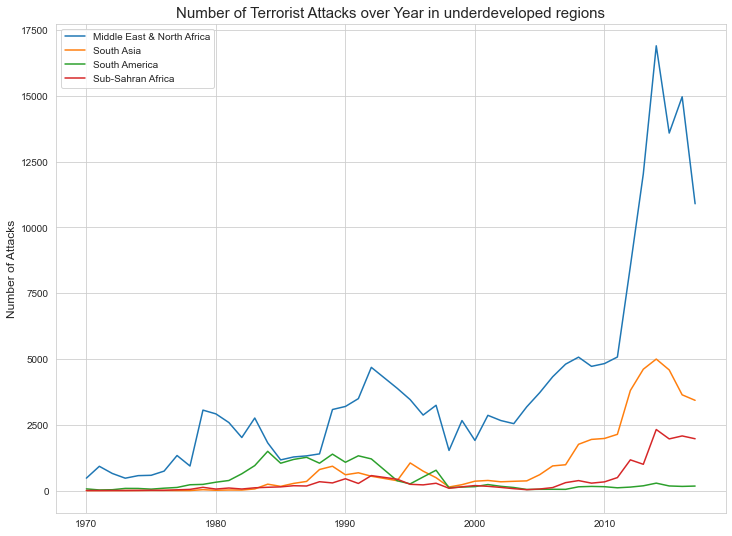

In [13]:
plt.figure(figsize = (12,9))
sns.lineplot(df_ME["Year"].value_counts().index,df["Year"].value_counts(),label = "Middle East & North Africa")
sns.lineplot(df_SAs["Year"].value_counts().index,df_SAs["Year"].value_counts(), label = "South Asia")
sns.lineplot(df_SA["Year"].value_counts().index,df_SA["Year"].value_counts(), label = "South America")
sns.lineplot(df_SsA["Year"].value_counts().index,df_SsA["Year"].value_counts(), label = "Sub-Sahran Africa")
plt.title("Number of Terrorist Attacks over Year in underdeveloped regions", fontsize = 15)
plt.ylabel("Number of Attacks", fontsize = 12)
plt.legend(loc = 'best')

Except of South America other Underdeveloped region faced jump in terrorist Activities

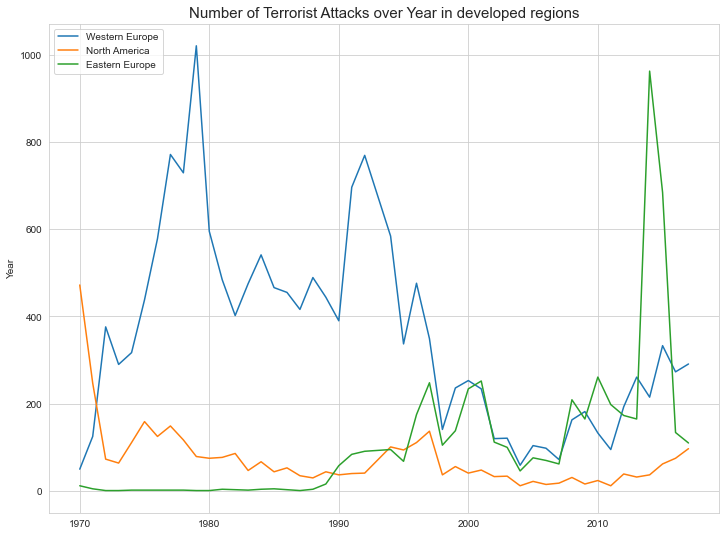

In [14]:
plt.figure(figsize = (12,9))
sns.lineplot(df_WE["Year"].value_counts().index,df_WE["Year"].value_counts(), label = "Western Europe")
sns.lineplot(df_NA["Year"].value_counts().index,df_NA["Year"].value_counts(), label = "North America")
sns.lineplot(df_EE["Year"].value_counts().index,df_EE["Year"].value_counts(), label = "Eastern Europe")
plt.title("Number of Terrorist Attacks over Year in developed regions", fontsize = 15)
plt.show()

Eastern Europe show a huge jump in Terrorist Activites in last decade, while Terrorist Activities in other  developed regions generally show decline.

In [15]:
print(f"Most number of Terrorist attacks were commited in {df.Country.value_counts().index[0]} \
: {df.Country.value_counts().max()}")
print(df["Country"].value_counts().nlargest(10))

Most number of Terrorist attacks were commited in Iraq : 24636
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


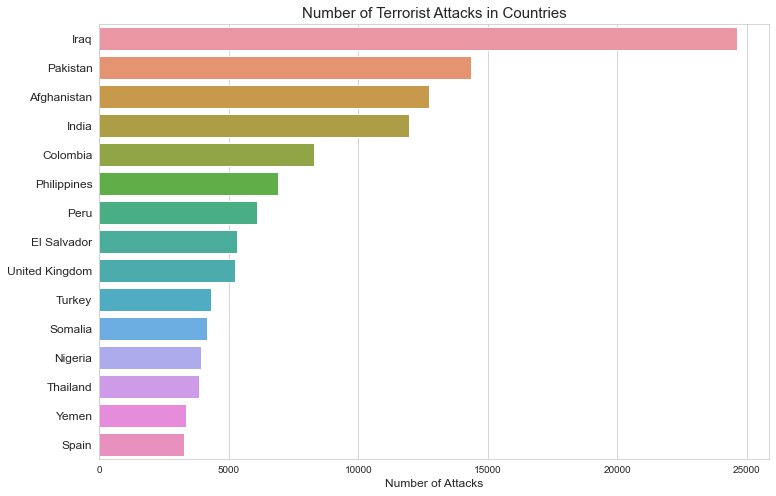

In [16]:
plt.figure(figsize = (12,8))
sns.barplot(df["Country"].value_counts().nlargest(15),df["Country"].value_counts().nlargest(15).index)
plt.xlabel("Number of Attacks", fontsize = 12)
plt.title("Number of Terrorist Attacks in Countries", fontsize = 15)
plt.yticks(fontsize = 12)
plt.show()

Iraq, Pakistan, Afghanisthan, India, Colombia were most attacked countries

In [17]:
data1 = df[['Country','nkill']].groupby('Country').sum().sort_values('nkill',ascending = False)
data1.reset_index(inplace=True)
print(f"Most number of people were kiled in {data1.Country[0]} \
: {data1.nkill[0]}")
data1.head(10)

Most number of people were kiled in Iraq : 78589.0


,Country,nkill
0,Iraq,78589.0
1,Afghanistan,39384.0
2,Pakistan,23822.0
3,Nigeria,22682.0
4,India,19341.0
5,Sri Lanka,15530.0
6,Syria,15229.0
7,Colombia,14698.0
8,Peru,12771.0
9,El Salvador,12053.0


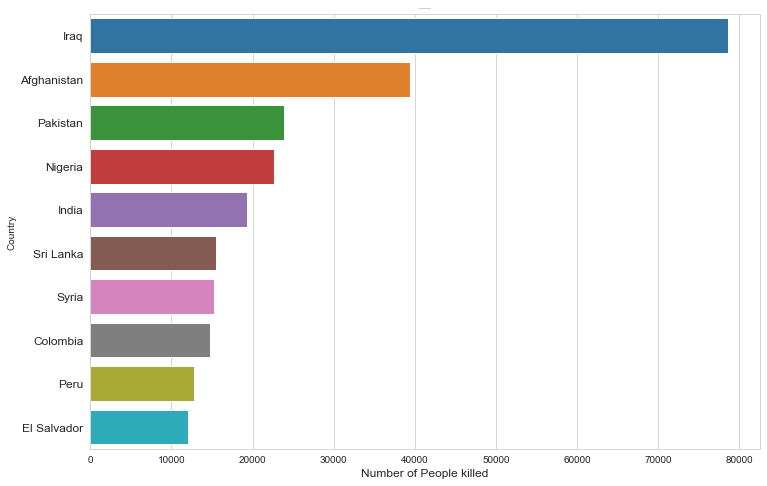

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(data1['nkill'][:10],data1['Country'][:10])
plt.xlabel("Number of People killed", fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("People killed in each country", fontsize = 1)
plt.show()

In Iraq, Afghanisthan, Pakistan,Nigeria, India, were most attacked countries

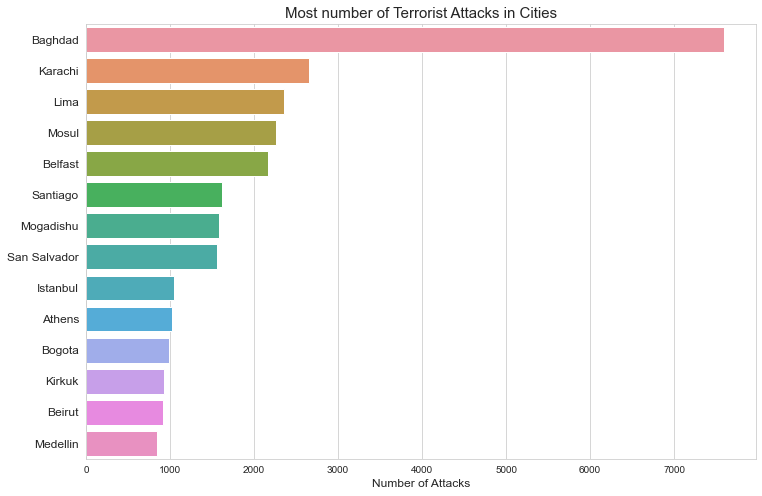

In [19]:
plt.figure(figsize = (12,8))
sns.barplot(df["city"].value_counts().nlargest(15)[1:16],df["city"].value_counts().nlargest(15)[1:16].index)
plt.xlabel("Number of Attacks", fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Most number of Terrorist Attacks in Cities", fontsize = 15)
plt.show()

Baghdad, Karachi, Lima, Mosul, Belfast cities suffered heighest number of Terrorist Attacks

In [19]:
df["Terrorist group"].value_counts().nlargest(15)[1:]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Terrorist group, dtype: int64

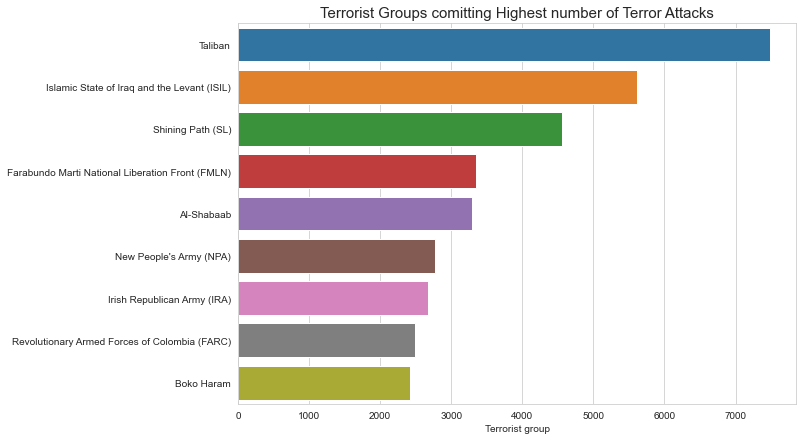

In [20]:
plt.figure(figsize= (10,7))
sns.barplot(df["Terrorist group"].value_counts()[1:10],\
            df["Terrorist group"].value_counts()[1:10].index)
plt.title('Terrorist Groups comitting Highest number of Terror Attacks',fontsize = 15)
plt.show()

Taliban, ISIL, Shining Path, FMLN, Al-Shabaab are terrorist groups carrying out largest numbers of terrorist attacks

In [21]:
data2 = df.groupby("Terrorist group")["nkill",'nwound'].sum().sort_values('nkill',ascending = False)
data2[1:]

,nkill,nwound
Terrorist group,,
Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0
Taliban,29410.0,27932.0
Boko Haram,20328.0,9473.0
Shining Path (SL),11601.0,3031.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0,11031.0
...,...,...
New Revolutionary Alternative (NRA),0.0,2.0
Council for the Destruction of Order,0.0,0.0
Counterrevolutionary Solidarity (SC),0.0,0.0


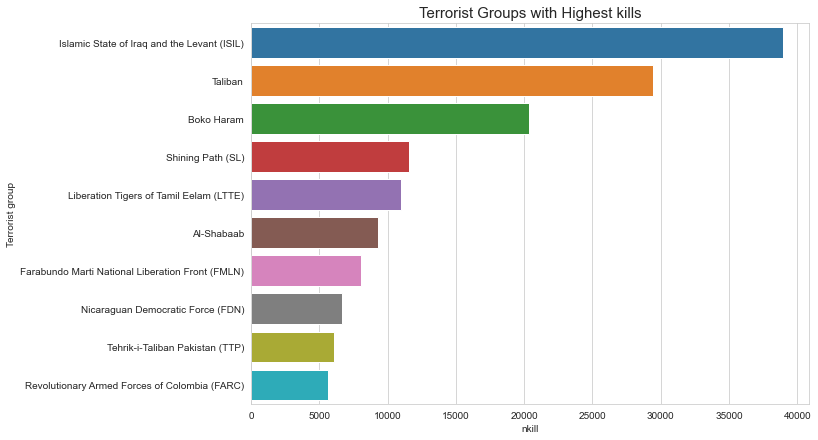

In [22]:
plt.figure(figsize= (10,7))
sns.barplot(data2["nkill"][1:11],data2.index[1:11])
plt.title('Terrorist Groups with Highest kills',fontsize = 15)
plt.show()

 ISIL, Taliban,Boko Haram,Shining Path, LTTE are terrorist groups killing largest number of people

In [22]:
print(f"Most number of Terrorist attacks were commited by {df.Attack_type.value_counts().index[0]} \
: {df.Attack_type.value_counts().max()}")
df["Attack_type"].value_counts()

Most number of Terrorist attacks were commited by Bombing/Explosion : 88255


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

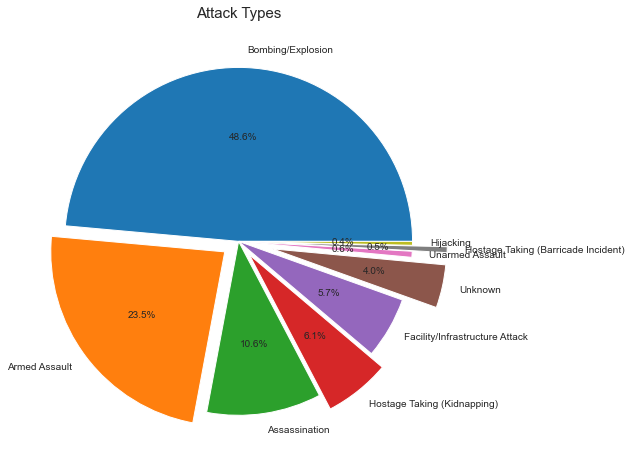

In [23]:
plt.figure(figsize = (12,8))
plt.pie(df["Attack_type"].value_counts(),labels = df["Attack_type"].value_counts().index,autopct="%.1f%%",\
        explode = [0.0,0.1,0.0,0.1,0.0,0.2,0.0,0.2,0.0])
plt.title('Attack Types',fontsize = 15)
plt.show()

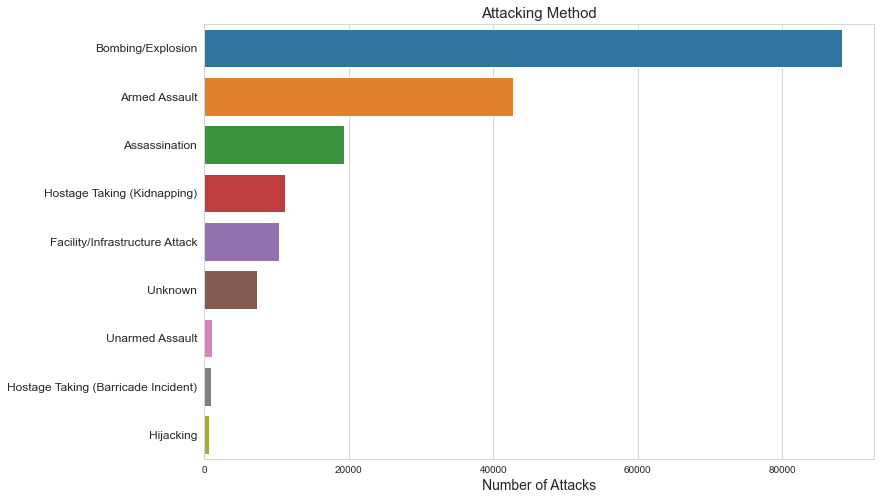

In [24]:
plt.figure(figsize = (12,8))
sns.barplot(df["Attack_type"].value_counts().nlargest(15),df["Attack_type"].value_counts().nlargest(15).index)
plt.xlabel("Number of Attacks", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title('Attacking Method',fontsize = 15)
plt.show()

Bombing and Armed Assault are most used in carrying out terrorist attacks

In [25]:
print(f"Most number of Terrorist attacks were commited on {df.Target_type.value_counts().index[0]} \
: {df.Target_type.value_counts().max()}")
df["Target_type"].value_counts()

Most number of Terrorist attacks were commited on Private Citizens & Property : 43511


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

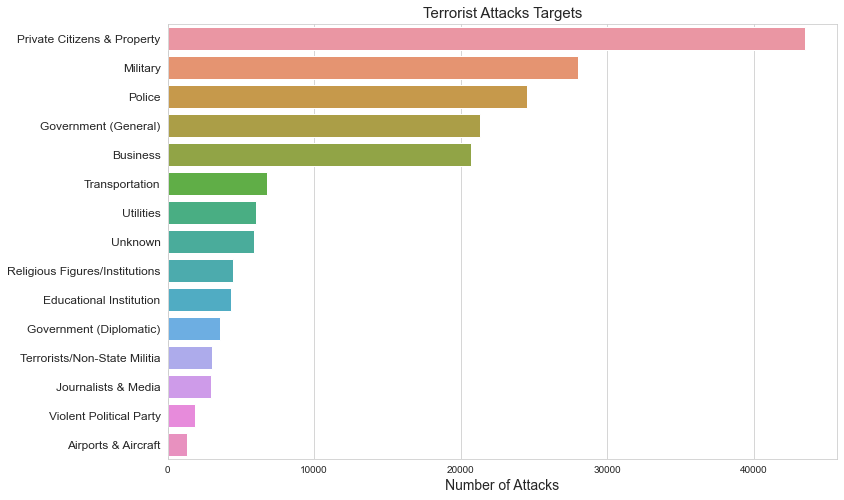

In [26]:
plt.figure(figsize = (12,8))
sns.barplot(df["Target_type"].value_counts().nlargest(15),df["Target_type"].value_counts().nlargest(15).index)
plt.xlabel("Number of Attacks", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title('Terrorist Attacks Targets',fontsize = 15)
plt.show()

Private Citizens & Property, Military, Police, Government, Business are favourite targets of Terrorist

In [27]:
df["Weapon Used"].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [28]:
def types(ty):
    return ty.split('(')[0]

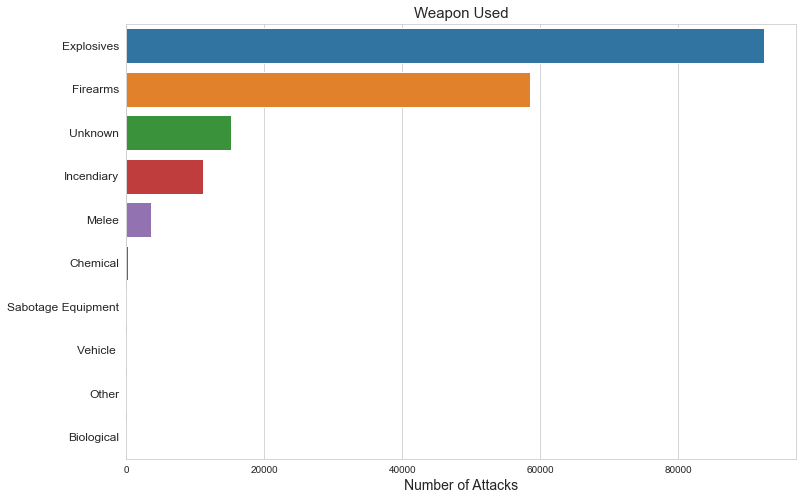

In [29]:
df["Weapon Used"] = df["Weapon Used"].apply(lambda x: f'{types(x)}')
plt.figure(figsize = (12,8))
sns.barplot(df["Weapon Used"].value_counts().nlargest(10),df["Weapon Used"].value_counts().nlargest(10).index)
plt.xlabel("Number of Attacks", fontsize = 14)
plt.yticks(fontsize = 12)
plt.title('Weapon Used',fontsize = 15)
plt.show()

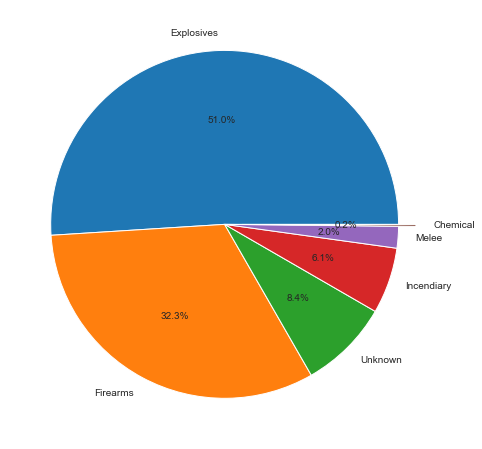

In [31]:
plt.figure(figsize = (12,8))
plt.pie(df["Weapon Used"].value_counts().nlargest(6),labels = df["Weapon Used"].value_counts().nlargest(6).index,\
        autopct="%.1f%%",explode = [0.0,0.0,0.0,0.0,0.0,0.1]
        )
plt.show()

Explosive and Firearms are most used weapon

In [30]:
years=set(df["Year"])
successrate=pd.DataFrame(columns=["Year","SuccessRate"])
for year in years:
    df_yr=df[df["Year"]==year]
    success=df_yr[df_yr["success"]==1]
    rate=len(success)*100/len(df_yr)
    rate_yr = pd.DataFrame({"Year":[year], "SuccessRate":[rate]}) 
    successrate=successrate.append(rate_yr,ignore_index=True)

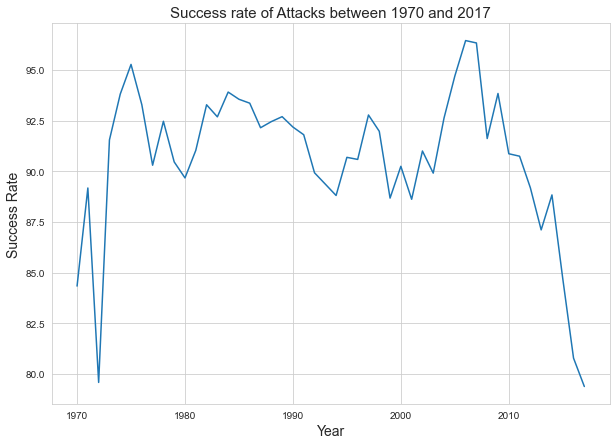

In [32]:
plt.figure(figsize = (10,7))
sns.lineplot( x='Year', y='SuccessRate',data = successrate)
plt.title("Success rate of Attacks between 1970 and 2017", fontsize = 15)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Success Rate",fontsize = 14)
plt.show()

Success rate of Terrorist declined this means the terrorist had to try more to carry out sucessfull attacks. This can be due to better response by Military and Police. 

## Thanks